In [71]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np


LOG.propagate = False

LOG.debug("debug")
LOG.info("info")
LOG.warning("warning")
LOG.error("error")
LOG.critical("critical")

# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
2023-05-05 04:12:14,834 | INFO     |: info
2023-05-05 04:12:14,836 | WARNING  |: warning
2023-05-05 04:12:14,838 | ERROR    |: error
2023-05-05 04:12:14,839 | CRITICAL |: critical
2023-05-05 04:12:14,844 | INFO     |: Looking for Artemis Nano Peripheral Device: c0:07:1d:96:09:44
2023-05-05 04:12:18,235 | INFO     |: Connected to c0:07:1d:96:09:44


In [54]:
# Read a string GATT Charactersistic
s = ble.receive_string(ble.uuid['RX_STRING'])
print(s)

[->9.0<-]


In [ ]:
s = ble.receive_string(ble.uuid['RX_STRING2'])
print(s)

In [ ]:
ble.send_command(CMD.SEND_TWO_INTS, "2|-6")

In [ ]:
ble.send_command(CMD.START, "")

In [ ]:
ble.send_command(CMD.STOP, "")


#### Notification Handler

In [72]:
      
d1 = []
TOFtimes = []
def tof_handler(uuid, byte_array):
    global d1
    global TOFtimes
    s = ble.bytearray_to_string(byte_array).split("|")   
    TOFtimes.append(int(s[0].split(":")[1]))
    d1.append(float(s[1].split(":")[1]))

pitch = []
roll = []
IMUtimes = []
def imu_handler(uuid, byte_array):
    global pitch
    global roll
    global IMUtimes
    s = ble.bytearray_to_string(byte_array).split("|")  
    IMUtimes.append(int(s[0].split(":")[1]))
    pitch.append(float(s[1].split(":")[1]))
    roll.append(float(s[2].split(":")[1]))    


    

In [ ]:
ble.start_notify(ble.uuid['RX_STRING'], imu_handler)

In [73]:
ble.start_notify(ble.uuid['RX_STRING'], tof_handler)

In [74]:
ble.send_command(CMD.GET_TOF_5s,"")

In [75]:
print(TOFtimes)
print(d1)

[64739, 64746, 64750, 64754, 64757, 64816, 64822, 64825, 64829, 64874, 64877, 64880, 64887, 64929, 64936, 64939, 64947, 64994, 65000, 65003, 65007, 65053, 65059, 65062, 65070, 65115, 65121, 65124, 65128, 65169, 65177, 65180, 65187, 65230, 65233, 65236, 65241, 65295, 65298, 65301, 65308, 65353, 65358, 65361, 65369, 65411, 65414, 65418, 65470, 65532, 65537, 65541, 65592, 65650, 65653, 65656, 65712, 65770, 65777, 65780, 65831, 65890, 65896, 65899, 65948, 66006, 66012, 66015, 66069, 66132, 66138, 66141, 66188, 66252, 66258, 66261, 66308, 66364, 66374, 66429, 66487, 66547, 66550, 66604, 66671, 66727, 66734, 66785, 66845, 66904, 66911, 66962, 67024, 67085, 67089, 67143, 67203, 67263, 67266, 67327, 67384, 67444, 67447, 67508, 67568, 67621, 67627, 67688, 67741, 67803, 67809, 67863, 67924, 67985, 67989, 68040, 68105, 68161, 68165, 68286, 68403, 68517, 68526, 68583, 68641, 68699, 68703, 68764, 68823, 68879, 68884, 68940, 68996, 69063, 69070, 69120, 69178, 69296, 69303, 69354, 69417, 69477, 69481

In [77]:
index = d1.index(1)
nTime = TOFtimes[17:index]
nd = d1[17:index]
print(nd)
print(nTime)

[3886.0, 3886.0, 3886.0, 3886.0, 3865.0, 3865.0, 3865.0, 3865.0, 3865.0, 3796.0, 3796.0, 3796.0, 3796.0, 3796.0, 3796.0, 3796.0, 3748.0, 3748.0, 3748.0, 3748.0, 3748.0, 3748.0, 3748.0, 3748.0, 3783.0, 3783.0, 3783.0, 3783.0, 3723.0, 3723.0, 3723.0, 3723.0, 3698.0, 3698.0, 3698.0, 3698.0, 3605.0, 3605.0, 3605.0, 3588.0, 3588.0, 3588.0, 3588.0, 3571.0, 3571.0, 3571.0, 3571.0, 3588.0, 3588.0, 3588.0, 3588.0, 3553.0, 3520.0, 3520.0, 3520.0, 3520.0, 3435.0, 3435.0, 3435.0, 3435.0, 3378.0, 3378.0, 3309.0, 3309.0, 3292.0, 3292.0, 3244.0, 3244.0, 3192.0, 3192.0, 3192.0, 3111.0, 3037.0, 3037.0, 3037.0, 3008.0, 2922.0, 2922.0, 2922.0, 2857.0, 2857.0, 2857.0, 2794.0, 2733.0, 2733.0, 2733.0, 2673.0, 2600.0, 2600.0, 2600.0, 2525.0, 2525.0, 2452.0, 2452.0, 2391.0, 2391.0, 2320.0, 2320.0, 2237.0, 2237.0, 2163.0, 2163.0, 2103.0, 2027.0, 1952.0, 1889.0, 1889.0, 1828.0, 1828.0, 1828.0, 1753.0, 1662.0, 1662.0, 1662.0, 1585.0, 1585.0, 1528.0, 1528.0, 1454.0, 1454.0, 1308.0, 1308.0, 1308.0, 1233.0, 1233.0,

In [ ]:
times = []
dist = []
pwm = []

def pid_handler(uuid,byte_array):
    global times
    global dist
    global pwm
    s = ble.bytearray_to_string(byte_array).split("|") 
    times.append(s[0].split(":")[1])
    dist.append(s[1].split(":")[1])
    pwm.append(s[2].split(":")[1])    

ble.start_notify(ble.uuid['RX_STRING'], pid_handler)
ble.send_command(CMD.START_PID, "")


In [ ]:
ble.send_command(CMD.STOP, "")


In [ ]:
print(times)
print(dist)
print(pwm)
print(len(times))
print(int(times[len(times)-1]) - int(times[0]))

In [ ]:
times = ['175646', '175646', '175649', '175649', '175660', '175660', '175671', '175671', '175684', '175684', '175690', '175690', '175701', '175701', '175712', '175712', '175723', '175723', '175732', '175732', '175738', '175738', '175743', '175743', '175754', '175754', '175760', '175760', '175765', '175765', '175770', '175770', '175776', '175776', '175787', '175787', '175800', '175800', '175805', '175805', '175816', '175816', '175827', '175827', '175838', '175838', '175845', '175845', '175856', '175856', '175867', '175867', '175878', '175878', '175889', '175889', '175905', '175905', '175920', '175920', '175931', '175931', '175942', '175942', '175953', '175953', '175969', '175969', '175980', '175980', '175993', '175993', '175999', '175999', '176004', '176004', '176015', '176015', '176028', '176028', '176034', '176034', '176045', '176045', '176050', '176050', '176056', '176056', '176061', '176061', '176067', '176067', '176077', '176077', '176091', '176091', '176096', '176096', '176107', '176107', '176118', '176118', '176123', '176123', '176133', '176133', '176138', '176138', '176149', '176149', '176160', '176160', '176171', '176171', '176182', '176182', '176193', '176193', '176210', '176210', '176220', '176220', '176231', '176231', '176239', '176239', '176250', '176250', '176261', '176261', '176272', '176272', '176283', '176283', '176294', '176294', '176305', '176305', '176310', '176310', '176321', '176321', '176332', '176332', '176343', '176343', '176348', '176348', '176354', '176354', '176365', '176365', '176376', '176376', '176382', '176382', '176393', '176393', '176404', '176404', '176421', '176421', '176434', '176434', '176439', '176439', '176450', '176450', '176456', '176456', '176461', '176461', '176467', '176467', '176472', '176472', '176478', '176478', '176488', '176488', '176499', '176499', '176510', '176510', '176522', '176522', '176533', '176533', '176544', '176544', '176555', '176555', '176566', '176566', '176579', '176579', '176585', '176585', '176590', '176590', '176596', '176596', '176601', '176601', '176607', '176607', '176612', '176612', '176617', '176617', '176623', '176623', '176628', '176628', '176634', '176634', '176639', '176639', '176650', '176650', '176661', '176661', '176672', '176672', '176683', '176683', '176694', '176694', '176711', '176711', '176724', '176724', '176729', '176729', '176740', '176740', '176751', '176751', '176762', '176762', '176767', '176767', '176777', '176777', '176782', '176782', '176788', '176788', '176793', '176793', '176799', '176799', '176804', '176804', '176810', '176810', '176815', '176815', '176821', '176821', '176826', '176826', '176837', '176837', '176850', '176850', '176859', '176859', '176875', '176875', '176886', '176886', '176897', '176897', '176908', '176908', '176914', '176914', '176919', '176919', '176930', '176930', '176936', '176936', '176941', '176941', '176947', '176947', '176958', '176958', '176969', '176969', '176974', '176974', '176980', '176980', '176985', '176985', '176996', '176996', '177007', '177007', '177012', '177012', '177023', '177023', '177029', '177029', '177034', '177034', '177045', '177045', '177056', '177056', '177071', '177071', '177077', '177077', '177088', '177088', '177099', '177099', '177109', '177109', '177119', '177119', '177125', '177125', '177130', '177130', '177141', '177141', '177148', '177148', '177153', '177153', '177164', '177164', '177175', '177175', '177186', '177186', '177191', '177191', '177202', '177202', '177209', '177209', '177220', '177220', '177231', '177231', '177242', '177242', '177253', '177253', '177263', '177263', '177274', '177274', '177280', '177280', '177285', '177285', '177291', '177291', '177296', '177296', '177307', '177307', '177318', '177318', '177329', '177329', '177340', '177340', '177351', '177351', '177362', '177362', '177374', '177374', '177380', '177380', '177390', '177390', '177401', '177401', '177407', '177407', '177414', '177414', '177425', '177425', '177436', '177436', '177447', '177447', '177464', '177464', '177479', '177479', '177490', '177490', '177501', '177501', '177512', '177512', '177522', '177522', '177533', '177533', '177542', '177542', '177553', '177553', '177564', '177564', '177575', '177575', '177586', '177586', '177597', '177597', '177610', '177610', '177621', '177621', '177637', '177637', '177648', '177648', '177659', '177659', '177675', '177675', '177686', '177686', '177700', '177700', '177711', '177711', '177722', '177722', '177733', '177733', '177750', '177750', '177761', '177761', '177771', '177771', '177787', '177787', '177792', '177792', '177803', '177803', '177814', '177814', '177825', '177825', '177839', '177839', '177850', '177850', '177861', '177861', '177872', '177872', '177883', '177883', '177894', '177894', '177905', '177905', '177913', '177913', '177924', '177924', '177935', '177935', '177946', '177946', '177957', '177957', '177968', '177968', '177973', '177973', '177979', '177979', '177984', '177984', '177995', '177995', '178001', '178001', '178008', '178008', '178019', '178019', '178030', '178030', '178041', '178041', '178052', '178052', '178063', '178063', '178069', '178069', '178074', '178074', '178085', '178085', '178096', '178096', '178107', '178107', '178118', '178118', '178132', '178132', '178143', '178143', '178154', '178154', '178165', '178165', '178176', '178176', '178186', '178186', '178192', '178192', '178198', '178198', '178208', '178208', '178219', '178219', '178230', '178230', '178241', '178241', '178252', '178252', '178263', '178263', '178280', '178280', '178290', '178290', '178301', '178301', '178307', '178307', '178312', '178312', '178318', '178318', '178325', '178325', '178331', '178331', '178342', '178342', '178353', '178353', '178359', '178359', '178370', '178370', '178381', '178381', '178392', '178392', '178403', '178403', '178412', '178412', '178423', '178423', '178434', '178434', '178444', '178444', '178455', '178455', '178466', '178466', '178479', '178479', '178485', '178485', '178496', '178496', '178507', '178507', '178518', '178518', '178529', '178529', '178535', '178535', '178546', '178546', '178557', '178557', '178568', '178568', '178579', '178579', '178590', '178590', '178595', '178595', '178606', '178606', '178617', '178617', '178623', '178623', '178630', '178630', '178641', '178641', '178652', '178652', '178663', '178663', '178674', '178674', '178683', '178683', '178694', '178694', '178705', '178705', '178715', '178715', '178726', '178726', '178739', '178739', '178745', '178745', '178756', '178756', '178767', '178767', '178773', '178773', '178784', '178784', '178795', '178795', '178806', '178806', '178815', '178815', '178826', '178826', '178842', '178842', '178853', '178853', '178869', '178869', '178880', '178880', '178891', '178891', '178898', '178898', '178909', '178909', '178920', '178920', '178931', '178931', '178942', '178942', '178953', '178953', '178958', '178958', '178969', '178969', '178980', '178980', '178985', '178985', '178992', '178992', '179003', '179003', '179014', '179014', '179025', '179025', '179036', '179036', '179052', '179052', '179067', '179067', '179078', '179078', '179089', '179089', '179100', '179100', '179111', '179111', '179122', '179122', '179130', '179130', '179141', '179141', '179152', '179152', '179169', '179169', '179180', '179180', '179192', '179192', '179203', '179203', '179219', '179219', '179235', '179235', '179246', '179246', '179257', '179257', '179271', '179271', '179282', '179282', '179293', '179293', '179304', '179304', '179315', '179315', '179326', '179326', '179337', '179337', '179348', '179348', '179359', '179359', '179370', '179370', '179386', '179386', '179397', '179397', '179414', '179414', '179425', '179425', '179435', '179435', '179446', '179446', '179457', '179457', '179468', '179468', '179479', '179479', '179490', '179490', '179503', '179503', '179514', '179514', '179531', '179531', '179542', '179542', '179552', '179552', '179566', '179566', '179576', '179576', '179587', '179587', '179598', '179598', '179609', '179609', '179615', '179615', '179621', '179621', '179627', '179627', '179638', '179638', '179649', '179649', '179655', '179655', '179661', '179661', '179663', '179663', '179669', '179669', '179671', '179671', '179675', '179675', '179677', '179677', '179679', '179679', '179682', '179682', '179684', '179684', '179686', '179686', '179689', '179689', '179691', '179691', '179693', '179693', '179697', '179697', '179699', '179699', '179701', '179701', '179703', '179703', '179705', '179705', '179708', '179708', '179714', '179714', '179716', '179716', '179718', '179718', '179724', '179724', '179726', '179726', '179728', '179728', '179732', '179732', '179734', '179734', '179736', '179736', '179738', '179738', '179740', '179740', '179747', '179747', '179749', '179749', '179752', '179752', '179768', '179768', '179779', '179779', '179790', '179790', '179801', '179801', '179813', '179813', '179818', '179818', '179824', '179824', '179835', '179835', '179846', '179846', '179857', '179857', '179862', '179862', '179873', '179873', '179884', '179884', '179898', '179898', '179903', '179903', '179914', '179914', '179925', '179925', '179936', '179936', '179943', '179943', '179954', '179954', '179972', '179972', '179983', '179983', '179994', '179994', '180005', '180005', '180018', '180018', '180024', '180024', '180035', '180035', '180045', '180045', '180056', '180056', '180067', '180067', '180078', '180078', '180089', '180089', '180100', '180100', '180111', '180111', '180122', '180122', '180133', '180133', '180144', '180144', '180155', '180155', '180166', '180166', '180175', '180175', '180185', '180185', '180196', '180196', '180213', '180213', '180224', '180224', '180235', '180235', '180243', '180243', '180251', '180251', '180262', '180262', '180268', '180268', '180273', '180273', '180279', '180279', '180289', '180289', '180300', '180300', '180307', '180307', '180318', '180318', '180329', '180329', '180340', '180340', '180356', '180356', '180367', '180367', '180378', '180378', '180393', '180393', '180399', '180399', '180410', '180410', '180421', '180421', '180431', '180431', '180439', '180439', '180450', '180450', '180461', '180461', '180472', '180472', '180483', '180483', '180494', '180494', '180507', '180507', '180512', '180512', '180518', '180518', '180529', '180529', '180531', '180531', '180533', '180533', '180539', '180539', '180541', '180541', '180543', '180543', '180549', '180549', '180551', '180551', '180553', '180553', '180557', '180557', '180559', '180559', '180564', '180564', '180566', '180566', '180568', '180568', '180573', '180573', '180575', '180575', '180577', '180577', '180580', '180580', '180582', '180582', '180584', '180584', '180588', '180588', '180590', '180590', '180592', '180592', '180595', '180595', '180597', '180597', '180599', '180599', '180605', '180605', '180607', '180607', '180609', '180609', '180615', '180615', '180617', '180617', '180619', '180619', '180623', '180623', '180625', '180625', '180627', '180627', '180629', '180629', '180631', '180631', '180633', '180633', '180636', '180636', '180638', '180638', '180640', '180640', '180644', '180644', '180646', '180646', '180648', '180648', '180650', '180650', '180652', '180652', '180654', '180654', '180660', '180660', '180662', '180662', '180664', '180664', '180670', '180670', '180672', '180672', '180674', '180674', '180678', '180678', '180680', '180680', '180682', '180682', '180684', '180684', '180687', '180687', '180689', '180689', '180691', '180691', '180694', '180694', '180696', '180696', '180700', '180700', '180702', '180702', '180704', '180704', '180706', '180706', '180708', '180708', '180710', '180710', '180716', '180716', '180718', '180718', '180720', '180720', '180726', '180726', '180728', '180728', '180730', '180730', '180734', '180734', '180736', '180736', '180738', '180738', '180740', '180740', '180742', '180742', '180744', '180744', '180747', '180747', '180749', '180749', '180753', '180753', '180755', '180755', '180757', '180757', '180762', '180762', '180764', '180764', '180766', '180766', '180769', '180769', '180771', '180771', '180773', '180773', '180777', '180777', '180779', '180779', '180781', '180781', '180784', '180784', '180786', '180786', '180788', '180788', '180791', '180791', '180793', '180793', '180795', '180795', '180799', '180799', '180801', '180801', '180803', '180803', '180805', '180805', '180807', '180807', '180809', '180809', '180815', '180815', '180817', '180817', '180819', '180819', '180825', '180825', '180827', '180827', '180829', '180829', '180835', '180835', '180837', '180837', '180839', '180839', '180843', '180843', '180845', '180845', '180847', '180847', '180849', '180849', '180851', '180851', '180853', '180853', '180859', '180859', '180861', '180861', '180863', '180863', '180867', '180867', '180869', '180869', '180871', '180871', '180873', '180873', '180875', '180875', '180877', '180877', '180880', '180880', '180882', '180882', '180884', '180884', '180890', '180890', '180892', '180892', '180894', '180894', '180899', '180899', '180901', '180901', '180903', '180903', '180908', '180908', '180910', '180910', '180912', '180912', '180915', '180915', '180917', '180917', '180919', '180919', '180923', '180923', '180925', '180925', '180927', '180927', '180929', '180929', '180931', '180931', '180933', '180933', '180936', '180936', '180938', '180938', '180942', '180942', '180944', '180944', '180946', '180946', '180948', '180948', '180950', '180950', '180952', '180952', '180959', '180959', '180961', '180961', '180963', '180963', '180969', '180969', '180971', '180971', '180973', '180973', '180977', '180977', '180979', '180979', '180981', '180981', '180983', '180983', '180985', '180985', '180987', '180987', '180990', '180990', '180992', '180992', '180994', '180994', '180998', '180998', '181000', '181000', '181002', '181002', '181007', '181007', '181009', '181009', '181011', '181011', '181014', '181014', '181016', '181016', '181018', '181018', '181022', '181022', '181024', '181024', '181026', '181026', '181033', '181033', '181035', '181035', '181037', '181037', '181039', '181039', '181041', '181041', '181048', '181048', '181050', '181050', '181052', '181052', '181058', '181058', '181060', '181060', '181062', '181062', '181066', '181066', '181068', '181068', '181070', '181070', '181072', '181072', '181075', '181075', '181077', '181077', '181079', '181079', '181082', '181082', '181084', '181084', '181088', '181088', '181090', '181090', '181092', '181092', '181094', '181094', '181096', '181096', '181098', '181098', '181104', '181104', '181106', '181106', '181108', '181108', '181114', '181114', '181116', '181116', '181118', '181118', '181122', '181122', '181124', '181124', '181126', '181126', '181128', '181128', '181130', '181130', '181132', '181132', '181138', '181138', '181140', '181140', '181146', '181146', '181148', '181148', '181150', '181150', '181154', '181154', '181156', '181156', '181158', '181158', '181161', '181161', '181163', '181163', '181165', '181165', '181168', '181168', '181170', '181170', '181172', '181172', '181176', '181176', '181178', '181178', '181180', '181180', '181182', '181182', '181184', '181184', '181186', '181186', '181192', '181192', '181194', '181194', '181196', '181196', '181203', '181203', '181205', '181205', '181207', '181207', '181211', '181211', '181213', '181213', '181215', '181215', '181217', '181217', '181219', '181219', '181221', '181221', '181224', '181224', '181226', '181226', '181230', '181230', '181232', '181232', '181234', '181234', '181239', '181239', '181241', '181241', '181243', '181243', '181246', '181246', '181248', '181248', '181250', '181250', '181256', '181256', '181259', '181259', '181261', '181261', '181265', '181265', '181267', '181267', '181269', '181269', '181274', '181274', '181276', '181276', '181278', '181278', '181281', '181281', '181283', '181283', '181285', '181285', '181289', '181289', '181291', '181291', '181293', '181293', '181295', '181295', '181297', '181297', '181299', '181299', '181302', '181302', '181304', '181304', '181306', '181306', '181310', '181310', '181312', '181312', '181314', '181314', '181316', '181316', '181318', '181318', '181320', '181320', '181326', '181326', '181328', '181328', '181330', '181330', '181336', '181336', '181338', '181338', '181340', '181340', '181344', '181344', '181346', '181346', '181348', '181348', '181350', '181350', '181353', '181353', '181355', '181355', '181357', '181357', '181360', '181360', '181362', '181362', '181366', '181366', '181368', '181368', '181370', '181370', '181375', '181375', '181377', '181377', '181379', '181379', '181382', '181382', '181384', '181384', '181386', '181386', '181390', '181390', '181392', '181392', '181394', '181394', '181396', '181396', '181398', '181398', '181400', '181400', '181403', '181403', '181405', '181405', '181409', '181409', '181411', '181411', '181413', '181413', '181415', '181415', '181417', '181417', '181419', '181419', '181425', '181425', '181428', '181428', '181430', '181430', '181434', '181434', '181436', '181436', '181438', '181438', '181440', '181440', '181442', '181442', '181444', '181444', '181447', '181447', '181449', '181449', '181451', '181451', '181455', '181455', '181457', '181457', '181459', '181459', '181461', '181461', '181463', '181463', '181465', '181465', '181471', '181471', '181473', '181473', '181475', '181475', '181482', '181482', '181484', '181484', '181486', '181486', '181493', '181493', '181495', '181495', '181499', '181499', '181501', '181501', '181503', '181503', '181508', '181508', '181510', '181510', '181512', '181512', '181515', '181515', '181517', '181517', '181519', '181519', '181525', '181525', '181527', '181527', '181529', '181529', '181533', '181533', '181535', '181535', '181537', '181537', '181539', '181539', '181542', '181542', '181544', '181544', '181550', '181550', '181552', '181552', '181554', '181554', '181560', '181560', '181562', '181562', '181564', '181564', '181570', '181570', '181572', '181572', '181574', '181574', '181578', '181578', '181580', '181580', '181582', '181582', '181584', '181584', '181586', '181586', '181588', '181588', '181591', '181591', '181593', '181593', '181597', '181597', '181599', '181599', '181601', '181601', '181606', '181606', '181608', '181608', '181610', '181610', '181613', '181613', '181615', '181615', '181617', '181617', '181621', '181621', '181623', '181623', '181625', '181625', '181628', '181628', '181630', '181630', '181632', '181632', '181635', '181635', '181637', '181637', '181639', '181639', '181643', '181643', '181645', '181645', '181647', '181647', '181649', '181649', '181651', '181651', '181653', '181653', '181659', '181659', '181661', '181661', '181663', '181663', '181669', '181669', '181671', '181671', '181673', '181673', '181677', '181677', '181679', '181679', '181681', '181681', '181683', '181683', '181685', '181685', '181687', '181687', '181690', '181690', '181692', '181692', '181694', '181694', '181700', '181700', '181702', '181702', '181704', '181704', '181708', '181708', '181710', '181710', '181712', '181712', '181717', '181717', '181719', '181719', '181721', '181721', '181724', '181724', '181726', '181726', '181728', '181728', '181734', '181734', '181736', '181736', '181738', '181738', '181742', '181742', '181744', '181744', '181746', '181746', '181748', '181748', '181751', '181751', '181753', '181753', '181759', '181759', '181761', '181761', '181763', '181763', '181769', '181769', '181771', '181771', '181773', '181773', '181777', '181777', '181779', '181779', '181781', '181781', '181783', '181783', '181785', '181785', '181787', '181787', '181790', '181790', '181792', '181792', '181794', '181794', '181801', '181801', '181803', '181803', '181805', '181805', '181807', '181807', '181809', '181809', '181812', '181812', '181814', '181814', '181816', '181816', '181820', '181820', '181822', '181822', '181824', '181824', '181826', '181826', '181828', '181828', '181830', '181830', '181836', '181836', '181838', '181838', '181840', '181840', '181846', '181846', '181848', '181848', '181851', '181851', '181855', '181855', '181857', '181857', '181859', '181859', '181861', '181861', '181863', '181863', '181865', '181865', '181868', '181868', '181870', '181870', '181872', '181872', '181876', '181876', '181878', '181878', '181880', '181880', '181885', '181885', '181887', '181887', '181889', '181889', '181892', '181892', '181894', '181894', '181896', '181896', '181900', '181900', '181902', '181902', '181904', '181904', '181906', '181906', '181908', '181908', '181911', '181911', '181913', '181913', '181915', '181915', '181919', '181919', '181921', '181921', '181923', '181923', '181928', '181928', '181931', '181931', '181933', '181933', '181936', '181936', '181938', '181938', '181940', '181940', '181944', '181944', '181946', '181946', '181948', '181948', '181950', '181950', '181952', '181952', '181954', '181954', '181957', '181957', '181959', '181959', '181961', '181961', '181965', '181965', '181967', '181967', '181969', '181969', '181974', '181974', '181976', '181976', '181978', '181978', '181981', '181981', '181983', '181983', '181985', '181985', '181989', '181989', '181991', '181991', '181993', '181993', '181995', '181995', '181997', '181997', '181999', '181999', '182002', '182002', '182004', '182004', '182006', '182006', '182010', '182010', '182012', '182012', '182014', '182014', '182019', '182019', '182021', '182021', '182023', '182023', '182026', '182026', '182028', '182028', '182030', '182030', '182034', '182034', '182036', '182036', '182038', '182038', '182040', '182040', '182042', '182042', '182044', '182044', '182047', '182047', '182049', '182049', '182051', '182051', '182055', '182055', '182057', '182057', '182059', '182059', '182064', '182064', '182066', '182066', '182068', '182068', '182071', '182071', '182074', '182074', '182076', '182076', '182080', '182080', '182082', '182082', '182084', '182084', '182086', '182086', '182088', '182088', '182090', '182090', '182093', '182093', '182095', '182095', '182097', '182097', '182101', '182101', '182103', '182103', '182105', '182105', '182107', '182107', '182109', '182109', '182111', '182111', '182117', '182117', '182119', '182119', '182123', '182123', '182125', '182125', '182127', '182127', '182129', '182129', '182131', '182131', '182133', '182133', '182136', '182136', '182138', '182138', '182140', '182140', '182144', '182144', '182146', '182146', '182148', '182148', '182151', '182151', '182153', '182153', '182155', '182155', '182161', '182161', '182163', '182163', '182165', '182165', '182171', '182171', '182173', '182173', '182175', '182175', '182179', '182179', '182181', '182181', '182183', '182183', '182185', '182185', '182187', '182187', '182189', '182189', '182195', '182195', '182197', '182197', '182199', '182199', '182205', '182205', '182207', '182207', '182209', '182209', '182213', '182213', '182215', '182215', '182217', '182217', '182219', '182219', '182221', '182221', '182223', '182223', '182226', '182226', '182228', '182228', '182230', '182230', '182234', '182234', '182236', '182236', '182238', '182238', '182240', '182240', '182242', '182242', '182244', '182244', '182250', '182250', '182252', '182252', '182255', '182255', '182261', '182261', '182263', '182263', '182265', '182265', '182271', '182271', '182273', '182273', '182275', '182275', '182279', '182279', '182281', '182281', '182283', '182283', '182288', '182288', '182290', '182290', '182292', '182292', '182295', '182295', '182297', '182297', '182299', '182299', '182303', '182303', '182305', '182305', '182307', '182307', '182309', '182309', '182311', '182311', '182314', '182314', '182316', '182316', '182318', '182318', '182322', '182322', '182324', '182324', '182326', '182326', '182331', '182331', '182334', '182334', '182336', '182336', '182339', '182339', '182341', '182341', '182343', '182343', '182349', '182349', '182351', '182351', '182353', '182353', '182357', '182357', '182359', '182359', '182361', '182361', '182363', '182363', '182365', '182365', '182367', '182367', '182370', '182370', '182372', '182372', '182374', '182374', '182378', '182378', '182380', '182380', '182382', '182382', '182387', '182387', '182389', '182389', '182391', '182391', '182394', '182394', '182396', '182396', '182398', '182398', '182402', '182402', '182404', '182404', '182406', '182406', '182408', '182408', '182410', '182410', '182412', '182412', '182415', '182415', '182417', '182417', '182419', '182419', '182423', '182423', '182425', '182425', '182427', '182427', '182432', '182432', '182434', '182434', '182436', '182436', '182439', '182439', '182441', '182441', '182443', '182443', '182447', '182447', '182449', '182449', '182451', '182451', '182453', '182453', '182456', '182456', '182458', '182458', '182460', '182460', '182463', '182463', '182465', '182465', '182469', '182469', '182471', '182471', '182473', '182473', '182475', '182475', '182477', '182477', '182479', '182479', '182485', '182485', '182487', '182487', '182489', '182489', '182495', '182495', '182497', '182497', '182499', '182499', '182503', '182503', '182505', '182505', '182507', '182507', '182509', '182509', '182511', '182511', '182513', '182513', '182516', '182516', '182518', '182518', '182522', '182522', '182524', '182524', '182526', '182526', '182533', '182533', '182535', '182535', '182537', '182537', '182540', '182540', '182542', '182542', '182544', '182544', '182548', '182548', '182550', '182550', '182552', '182552', '182554', '182554', '182556', '182556', '182558', '182558', '182561', '182561', '182563', '182563', '182565', '182565', '182569', '182569', '182571', '182571', '182573', '182573', '182578', '182578', '182580', '182580', '182582', '182582', '182585', '182585', '182588', '182588', '182590', '182590', '182594', '182594', '182596', '182596', '182598', '182598', '182600', '182600', '182602', '182602', '182604', '182604', '182607', '182607', '182609', '182609', '182611', '182611', '182615', '182615', '182617', '182617', '182619', '182619', '182624', '182624', '182626', '182626', '182629', '182629', '182631', '182631', '182633', '182633', '182637', '182637', '182639', '182639', '182641', '182641', '182643', '182643', '182645', '182645', '182647', '182647', '182650', '182650', '182652', '182652', '182654', '182654', '182658', '182658', '182660', '182660', '182662', '182662', '182667', '182667', '182670', '182670', '182672', '182672', '182675', '182675', '182677', '182677', '182679', '182679', '182685', '182685', '182687', '182687', '182689', '182689', '182693', '182693', '182695', '182695', '182697', '182697', '182702', '182702', '182704', '182704', '182706', '182706', '182709', '182709', '182711', '182711', '182713', '182713', '182717', '182717', '182719', '182719', '182721', '182721', '182723', '182723', '182725', '182725', '182727', '182727', '182730', '182730', '182732', '182732', '182734', '182734', '182738', '182738', '182740', '182740', '182742', '182742', '182747', '182747', '182749', '182749', '182751', '182751', '182754', '182754', '182756', '182756', '182758', '182758', '182764', '182764', '182766', '182766', '182768', '182768', '182772', '182772', '182774', '182774', '182776', '182776', '182781', '182781', '182783', '182783', '182785', '182785', '182788', '182788', '182791', '182791', '182793', '182793', '182797', '182797', '182799', '182799', '182801', '182801', '182803', '182803', '182805', '182805', '182807', '182807', '182810', '182810', '182812', '182812', '182814', '182814', '182818', '182818', '182820', '182820', '182822', '182822', '182824', '182824', '182826', '182826', '182828', '182828', '182834', '182834', '182836', '182836', '182843', '182843', '182845', '182845', '182847', '182847', '182851', '182851', '182853', '182853', '182855', '182855', '182857', '182857', '182859', '182859', '182861', '182861', '182867', '182867', '182869', '182869', '182872', '182872', '182878', '182878', '182880', '182880', '182882', '182882', '182886', '182886', '182888', '182888', '182890', '182890', '182892', '182892', '182894', '182894', '182896', '182896', '182899', '182899', '182901', '182901', '182903', '182903', '182907', '182907', '182909', '182909', '182911', '182911', '182913', '182913', '182915', '182915', '182921', '182921', '182923', '182923', '182925', '182925', '182929', '182929', '182931', '182931', '182933', '182933', '182936', '182936', '182938', '182938', '182940', '182940', '182943', '182943', '182945', '182945', '182947', '182947', '182951', '182951', '182953', '182953', '182955', '182955', '182957', '182957', '182959', '182959', '182961', '182961', '182967', '182967', '182969', '182969', '182971', '182971', '182975', '182975', '182977', '182977', '182979', '182979', '182981', '182981', '182983', '182983', '182985', '182985', '182988', '182988', '182990', '182990', '182992', '182992', '182998', '182998', '183000', '183000', '183002', '183002', '183006', '183006', '183008', '183008', '183010', '183010', '183015', '183015', '183017', '183017', '183019', '183019', '183022', '183022', '183024', '183024', '183026', '183026', '183032', '183032', '183034', '183034', '183036', '183036', '183040', '183040', '183042', '183042', '183044', '183044', '183046', '183046', '183049', '183049', '183051', '183051', '183057', '183057', '183059', '183059', '183061', '183061', '183067', '183067', '183069', '183069', '183071', '183071', '183075', '183075', '183077', '183077', '183079', '183079', '183081', '183081', '183083', '183083', '183085', '183085', '183088', '183088', '183090', '183090', '183092', '183092', '183099', '183099', '183101', '183101', '183103', '183103', '183105', '183105', '183107', '183107', '183110', '183110', '183112', '183112', '183114', '183114', '183118', '183118', '183120', '183120', '183122', '183122', '183124', '183124', '183126', '183126', '183128', '183128', '183134', '183134', '183136', '183136', '183138', '183138', '183144', '183144', '183146', '183146', '183149', '183149', '183155', '183155', '183157', '183157', '183159', '183159', '183163', '183163', '183165', '183165', '183167', '183167']
tof = ['0', '0', '1999', '1999', '1999', '1999', '1999', '1999', '1999', '1999', '1999', '1999', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '2005', '1973', '1973', '1973', '1973', '1973', '1973', '1973', '1973', '1973', '1973', '1973', '1973', '1973', '1973', '1973', '1973', '1973', '1973', '1973', '1973', '1975', '1975', '1975', '1975', '1975', '1975', '1975', '1975', '1975', '1975', '1975', '1975', '1975', '1975', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1938', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1934', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1869', '1837', '1837', '1837', '1837', '1837', '1837', '1837', '1837', '1837', '1837', '1837', '1837', '1837', '1837', '1837', '1837', '1837', '1837', '1837', '1837', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1774', '1740', '1740', '1740', '1740', '1740', '1740', '1740', '1740', '1740', '1740', '1740', '1740', '1740', '1740', '1740', '1740', '1740', '1740', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1681', '1641', '1641', '1641', '1641', '1641', '1641', '1641', '1641', '1641', '1641', '1641', '1641', '1641', '1641', '1641', '1641', '1641', '1641', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1573', '1520', '1520', '1520', '1520', '1520', '1520', '1520', '1520', '1520', '1520', '1520', '1520', '1520', '1520', '1520', '1520', '1520', '1520', '1520', '1520', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1476', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1442', '1438', '1438', '1438', '1438', '1438', '1438', '1438', '1438', '1438', '1438', '1438', '1438', '1438', '1438', '1438', '1438', '1438', '1438', '1438', '1438', '1394', '1394', '1394', '1394', '1394', '1394', '1394', '1394', '1394', '1394', '1394', '1394', '1394', '1394', '1394', '1394', '1394', '1394', '1394', '1394', '1341', '1341', '1341', '1341', '1341', '1341', '1341', '1341', '1341', '1341', '1341', '1341', '1341', '1341', '1341', '1341', '1341', '1341', '1341', '1341', '1293', '1293', '1293', '1293', '1293', '1293', '1293', '1293', '1293', '1293', '1293', '1293', '1293', '1293', '1293', '1293', '1245', '1245', '1245', '1245', '1245', '1245', '1245', '1245', '1245', '1245', '1245', '1245', '1245', '1245', '1245', '1245', '1200', '1200', '1200', '1200', '1200', '1200', '1200', '1200', '1200', '1200', '1200', '1200', '1200', '1200', '1200', '1200', '1151', '1151', '1151', '1151', '1151', '1151', '1151', '1151', '1151', '1151', '1151', '1151', '1151', '1151', '1151', '1151', '1151', '1151', '1113', '1113', '1113', '1113', '1113', '1113', '1113', '1113', '1113', '1113', '1113', '1113', '1113', '1113', '1113', '1113', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1066', '1020', '1020', '1020', '1020', '1020', '1020', '1020', '1020', '1020', '1020', '1020', '1020', '1020', '1020', '1020', '1020', '1020', '1020', '978', '978', '978', '978', '978', '978', '978', '978', '978', '978', '978', '978', '978', '978', '978', '978', '978', '978', '978', '978', '928', '928', '928', '928', '928', '928', '928', '928', '928', '928', '928', '928', '928', '928', '928', '928', '928', '928', '894', '894', '894', '894', '894', '894', '894', '894', '894', '894', '894', '894', '894', '894', '894', '894', '894', '894', '894', '894', '894', '894', '851', '851', '851', '851', '851', '851', '851', '851', '851', '851', '851', '851', '851', '851', '851', '851', '851', '851', '807', '807', '807', '807', '807', '807', '807', '807', '807', '807', '807', '807', '807', '807', '807', '807', '807', '807', '759', '759', '759', '759', '759', '759', '759', '759', '759', '759', '759', '759', '759', '759', '759', '759', '759', '759', '759', '759', '721', '721', '721', '721', '721', '721', '721', '721', '721', '721', '721', '721', '721', '721', '721', '721', '721', '721', '721', '721', '678', '678', '678', '678', '678', '678', '678', '678', '678', '678', '678', '678', '678', '678', '678', '678', '636', '636', '636', '636', '636', '636', '636', '636', '636', '636', '636', '636', '636', '636', '636', '636', '636', '636', '636', '636', '591', '591', '591', '591', '591', '591', '591', '591', '591', '591', '591', '591', '591', '591', '591', '591', '549', '549', '549', '549', '549', '549', '549', '549', '549', '549', '549', '549', '549', '549', '549', '549', '549', '549', '507', '507', '507', '507', '507', '507', '507', '507', '507', '507', '507', '507', '507', '507', '466', '466', '466', '466', '466', '466', '466', '466', '466', '466', '466', '466', '466', '466', '466', '466', '466', '466', '425', '425', '425', '425', '425', '425', '425', '425', '425', '425', '425', '425', '425', '425', '425', '425', '385', '385', '385', '385', '385', '385', '385', '385', '385', '385', '385', '385', '385', '385', '385', '385', '342', '342', '342', '342', '342', '342', '342', '342', '342', '342', '342', '342', '342', '342', '342', '342', '342', '342', '342', '342', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '305', '264', '264', '264', '264', '264', '264', '264', '264', '264', '264', '264', '264', '264', '264', '264', '264', '264', '264', '264', '264', '236', '236', '236', '236', '236', '236', '236', '236', '236', '236', '236', '236', '236', '236', '236', '236', '236', '236', '236', '236', '223', '223', '223', '223', '223', '223', '223', '223', '223', '223', '223', '223', '223', '223', '223', '223', '223', '223', '227', '227', '227', '227', '227', '227', '227', '227', '227', '227', '227', '227', '227', '227', '227', '227', '233', '233', '233', '233', '233', '233', '233', '233', '233', '233', '233', '233', '233', '233', '233', '233', '233', '233', '240', '240', '240', '240', '240', '240', '240', '240', '240', '240', '240', '240', '240', '240', '240', '240', '240', '240', '240', '240', '240', '240', '250', '250', '250', '250', '250', '250', '250', '250', '250', '250', '250', '250', '250', '250', '250', '250', '262', '262', '262', '262', '262', '262', '262', '262', '262', '262', '262', '262', '262', '262', '262', '262', '262', '262', '262', '262', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '279', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '294', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '295', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '296', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297', '297']
mot = ['-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-51', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-49', '-48', '-48', '-48', '-48', '-48', '-48', '-48', '-48', '-48', '-48', '-48', '-48', '-48', '-48', '-48', '-48', '-48', '-48', '-48', '-48', '-46', '-46', '-46', '-46', '-46', '-46', '-46', '-46', '-46', '-46', '-46', '-46', '-46', '-46', '-46', '-46', '-46', '-46', '-45', '-45', '-45', '-45', '-45', '-45', '-45', '-45', '-45', '-45', '-45', '-45', '-45', '-45', '-45', '-45', '-45', '-45', '-45', '-45', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-44', '-43', '-43', '-43', '-43', '-43', '-43', '-43', '-43', '-43', '-43', '-43', '-43', '-43', '-43', '-43', '-43', '-43', '-43', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-41', '-40', '-40', '-40', '-40', '-40', '-40', '-40', '-40', '-40', '-40', '-40', '-40', '-40', '-40', '-40', '-40', '-40', '-40', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-36', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-35', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-32', '-32', '-32', '-32', '-32', '-32', '-32', '-32', '-32', '-32', '-32', '-32', '-32', '-32', '-32', '-32', '-32', '-32', '-32', '-32', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-29', '-29', '-29', '-29', '-29', '-29', '-29', '-29', '-29', '-29', '-29', '-29', '-29', '-29', '-29', '-29', '-28', '-28', '-28', '-28', '-28', '-28', '-28', '-28', '-28', '-28', '-28', '-28', '-28', '-28', '-28', '-28', '-26', '-26', '-26', '-26', '-26', '-26', '-26', '-26', '-26', '-26', '-26', '-26', '-26', '-26', '-26', '-26', '-25', '-25', '-25', '-25', '-25', '-25', '-25', '-25', '-25', '-25', '-25', '-25', '-25', '-25', '-25', '-25', '-25', '-25', '-24', '-24', '-24', '-24', '-24', '-24', '-24', '-24', '-24', '-24', '-24', '-24', '-24', '-24', '-24', '-24', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-22', '-21', '-21', '-21', '-21', '-21', '-21', '-21', '-21', '-21', '-21', '-21', '-21', '-21', '-21', '-21', '-21', '-21', '-21', '-20', '-20', '-20', '-20', '-20', '-20', '-20', '-20', '-20', '-20', '-20', '-20', '-20', '-20', '-20', '-20', '-20', '-20', '-20', '-20', '-18', '-18', '-18', '-18', '-18', '-18', '-18', '-18', '-18', '-18', '-18', '-18', '-18', '-18', '-18', '-18', '-18', '-18', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-17', '-16', '-16', '-16', '-16', '-16', '-16', '-16', '-16', '-16', '-16', '-16', '-16', '-16', '-16', '-16', '-16', '-16', '-16', '-15', '-15', '-15', '-15', '-15', '-15', '-15', '-15', '-15', '-15', '-15', '-15', '-15', '-15', '-15', '-15', '-15', '-15', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-12', '-12', '-12', '-12', '-12', '-12', '-12', '-12', '-12', '-12', '-12', '-12', '-12', '-12', '-12', '-12', '-12', '-12', '-12', '-12', '-11', '-11', '-11', '-11', '-11', '-11', '-11', '-11', '-11', '-11', '-11', '-11', '-11', '-11', '-11', '-11', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-9', '-8', '-8', '-8', '-8', '-8', '-8', '-8', '-8', '-8', '-8', '-8', '-8', '-8', '-8', '-8', '-8', '-7', '-7', '-7', '-7', '-7', '-7', '-7', '-7', '-7', '-7', '-7', '-7', '-7', '-7', '-7', '-7', '-7', '-7', '-6', '-6', '-6', '-6', '-6', '-6', '-6', '-6', '-6', '-6', '-6', '-6', '-6', '-6', '-4', '-4', '-4', '-4', '-4', '-4', '-4', '-4', '-4', '-4', '-4', '-4', '-4', '-4', '-4', '-4', '-4', '-4', '-3', '-3', '-3', '-3', '-3', '-3', '-3', '-3', '-3', '-3', '-3', '-3', '-3', '-3', '-3', '-3', '-2', '-2', '-2', '-2', '-2', '-2', '-2', '-2', '-2', '-2', '-2', '-2', '-2', '-2', '-2', '-2', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '-1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']

In [ ]:
times = ['172174', '172840', '172851', '172861', '172872', '172883', '172894', '172905', '172922', '172933', '172944', '172955', '172965', '172982', '172993', '173004', '173011', '173022', '173033', '173044', '173055', '173067', '173078', '173094', '173105', '173122', '173133', '173144', '173149', '173155', '173166', '173171', '173177', '173182', '173193', '173204', '173209', '173215', '173226', '173237', '173242', '173253', '173264', '173277', '173283', '173294', '173299', '173304', '173310', '173319', '173329', '173340', '173357', '173373', '173384', '173395', '173406', '173421', '173432', '173443', '173454', '173465', '173476', '173487', '173503', '173520', '173530', '173536', '173541', '173552', '173563', '173574', '173587', '173596', '173607', '173618', '173629', '173636', '173647', '173658', '173675', '173686', '173697', '173708', '173720', '173731', '173741', '173758', '173769', '173778', '173784', '173789', '173800', '173806', '173817', '173828', '173839', '173846', '173857', '173868', '173879', '173890', '173901', '173906', '173917', '173928', '173939', '173954', '173960', '173971', '173982', '173992', '173998', '174003', '174009', '174016', '174026', '174037', '174048', '174059', '174073', '174079', '174084', '174090', '174103', '174108', '174114', '174120', '174131', '174142', '174153', '174162', '174173', '174184', '174195', '174205', '174216', '174222', '174233', '174244', '174250', '174256', '174267', '174278', '174283', '174291', '174302', '174313', '174324', '174334', '174345', '174352', '174357', '174368', '174374', '174379', '174385', '174396', '174403', '174414', '174425', '174436', '174442', '174453', '174458', '174463', '174474', '174480', '174485', '174491', '174502', '174507', '174513', '174524', '174535', '174546', '174554', '174567', '174573', '174584', '174595', '174605', '174616', '174631', '174642', '174653', '174664', '174675', '174681', '174692', '174697', '174708', '174719', '174730', '174735', '174741', '174752', '174763', '174777', '174782', '174788', '174799', '174810', '174824', '174835', '174846', '174857', '174867', '174878', '174884', '174889', '174900', '174911', '174922', '174933', '174949', '174966', '174977', '174986', '174997', '175008', '175019', '175030', '175036', '175047', '175058', '175068', '175074', '175083', '175093', '175110', '175126', '175143', '175159', '175170', '175181', '175194', '175199', '175205', '175216', '175221', '175227', '175232', '175243', '175254', '175265', '175276', '175287', '175298', '175314', '175325', '175331', '175342', '175347', '175358', '175369', '175376', '175389', '175400', '175411', '175427', '175438', '175449', '175460', '175471', '175482', '175493', '175504', '175514', '175525', '175541', '175546', '175551', '175558', '175569', '175580', '175591', '175602', '175613', '175618', '175624', '175635', '175650', '175661', '175672', '175682', '175693', '175704', '175714', '175725', '175741', '175758', '175774', '175785', '175794', '175805', '175816', '175826', '175837', '175854', '175869', '175880', '175891', '175902', '175913', '175924', '175939', '175950', '175961', '175972', '175983', '175994', '176008', '176013', '176024', '176035', '176046', '176056', '176067', '176084', '176094', '176111', '176122', '176131', '176147', '176157', '176168', '176179', '176190', '176201', '176212', '176223', '176234', '176246', '176259', '176265', '176275', '176281', '176291', '176302', '176312', '176323', '176340', '176351', '176362', '176373', '176378', '176389', '176400', '176411', '176417', '176428', '176439', '176450', '176463', '176469', '176471', '176474', '176476', '176478', '176480', '176482', '176484', '176487', '176489', '176492', '176494', '176496', '176502', '176504', '176506', '176509', '176511', '176513', '176519', '176522', '176524', '176527', '176529', '176531', '176537', '176539', '176546', '176548', '176550', '176556', '176567', '176573', '176584', '176589', '176595', '176600', '176606', '176611', '176622', '176633', '176645', '176650', '176656', '176661', '176672', '176683', '176689', '176700', '176705', '176716', '176722', '176732', '176743', '176754', '176760', '176765', '176776', '176782', '176787', '176793', '176804', '176813', '176819', '176824', '176835', '176846', '176861', '176872', '176883', '176894', '176905', '176916', '176925', '176931', '176942', '176953', '176964', '176979', '176990', '177001', '177012', '177023', '177038', '177043', '177054', '177065', '177075', '177080', '177091', '177096', '177102', '177111', '177121', '177132', '177143', '177154', '177165', '177171', '177182', '177193', '177204', '177220', '177234', '177239', '177250', '177261', '177267', '177276', '177287', '177298', '177309', '177322', '177328', '177333', '177344', '177355', '177372', '177382', '177393', '177404', '177415', '177428', '177434', '177445', '177456', '177467', '177478', '177489', '177499', '177513', '177518', '177523', '177534', '177545', '177555', '177560', '177571', '177582', '177593', '177602', '177613', '177624', '177640', '177651', '177662', '177673', '177678', '177684', '177689', '177700', '177706', '177714', '177725', '177742', '177758', '177769', '177786', '177796', '177807', '177818', '177824', '177835', '177846', '177857', '177868', '177873', '177884', '177895', '177906', '177917', '177933', '177944', '177955', '177966', '177982', '177993', '177999', '178004', '178006', '178008', '178013', '178015', '178020', '178022', '178024', '178029', '178031', '178033', '178038', '178041', '178043', '178045', '178047', '178049', '178052', '178054', '178056', '178062', '178064', '178066', '178069', '178071', '178073', '178079', '178081', '178083', '178090', '178092', '178094', '178097', '178099', '178106', '178108', '178110', '178113', '178115', '178117', '178123', '178125', '178127', '178130', '178132', '178134', '178140', '178142', '178145', '178147', '178150', '178152', '178158', '178160', '178162', '178165', '178167', '178169', '178175', '178177', '178179', '178185', '178187', '178189', '178192', '178194', '178196', '178202', '178204', '178207', '178209', '178211', '178217', '178219', '178221', '178224', '178226', '178228', '178234', '178237', '178239', '178242', '178244', '178246', '178250', '178252', '178254', '178258', '178260', '178262', '178266', '178268', '178270', '178274', '178276', '178278', '178280', '178282', '178284', '178287', '178289', '178291', '178294', '178296', '178298', '178304', '178306', '178308', '178311', '178313', '178315', '178321', '178323', '178325', '178328', '178330', '178332', '178338', '178340', '178342', '178349', '178351', '178354', '178356', '178358', '178361', '178363', '178365', '178369', '178371', '178373', '178379', '178382', '178384', '178390', '178392', '178394', '178397', '178399', '178401', '178407', '178409', '178411', '178414', '178416', '178418', '178422', '178424', '178426', '178432', '178434', '178436', '178442', '178444', '178446', '178449', '178451', '178453', '178459', '178461', '178463', '178466', '178468', '178470', '178476', '178478', '178481', '178487', '178489', '178491', '178494', '178496', '178498', '178501', '178503', '178505', '178509', '178511', '178513', '178517', '178519', '178521', '178523', '178525', '178530', '178532', '178534', '178539', '178541', '178544', '178549', '178551', '178553', '178560', '178562', '178564', '178566', '178568', '178570', '178575', '178577', '178579', '178584', '178586', '178591', '178593', '178595', '178600', '178602', '178604', '178611', '178613', '178615', '178617', '178619', '178621', '178624', '178626', '178628', '178631', '178633', '178635', '178641', '178643', '178646', '178648', '178651', '178653', '178659', '178661', '178663', '178666', '178668', '178670', '178676', '178678', '178680', '178687', '178689', '178692', '178694', '178696', '178702', '178704', '178706', '178709', '178711', '178713', '178719', '178721', '178723', '178730', '178732', '178735', '178737', '178739', '178742', '178744', '178746', '178752', '178754', '178756', '178763', '178765', '178767', '178770', '178772', '178774', '178780', '178782', '178784', '178787', '178789', '178791', '178795', '178797', '178799', '178805', '178807', '178809', '178815', '178817', '178819', '178822', '178824', '178826', '178832', '178834', '178836', '178839', '178841', '178843', '178847', '178849', '178851', '178855', '178857', '178859', '178863', '178865', '178867', '178869', '178871', '178873', '178876', '178878', '178880', '178887', '178889', '178892', '178894', '178896', '178902', '178904', '178906', '178909', '178911', '178913', '178919', '178922', '178924', '178927', '178929', '178931', '178937', '178939', '178941', '178944', '178946', '178948', '178952', '178954', '178956', '178962', '178964', '178966', '178972', '178974', '178976', '178979', '178981', '178983', '178989', '178991', '178993', '178996', '178998', '179000', '179006', '179008', '179010', '179017', '179019', '179022', '179024', '179026', '179032', '179034', '179036', '179039', '179041', '179043', '179049', '179052', '179054', '179057', '179059', '179061', '179067', '179069', '179071', '179077', '179079', '179081', '179086', '179088', '179090', '179093', '179095', '179097', '179100', '179102', '179104', '179110', '179112', '179114', '179120', '179122', '179124', '179127', '179129', '179131', '179138', '179140', '179143', '179145', '179147', '179153', '179155', '179157', '179160', '179162', '179164', '179170', '179173', '179175', '179178', '179180', '179182', '179188', '179190', '179192', '179195', '179197', '179199', '179203', '179205', '179207', '179213', '179215', '179217', '179223', '179225', '179227', '179230', '179232', '179234', '179240', '179242', '179244', '179250', '179252', '179254', '179257', '179259', '179261', '179267', '179269', '179271', '179274', '179277', '179279', '179285', '179287', '179289', '179292', '179294', '179296', '179302', '179304', '179306', '179313', '179315', '179318', '179320', '179322', '179328', '179330', '179332', '179335', '179337', '179339', '179345', '179347', '179349', '179352', '179354', '179356', '179362', '179364', '179366', '179372', '179374', '179376', '179379', '179381', '179383', '179389', '179391', '179394', '179396', '179399', '179401', '179407', '179409', '179411', '179414', '179416', '179418', '179424', '179426', '179428', '179431', '179433', '179435', '179441', '179443', '179446', '179448', '179450', '179456', '179458', '179460', '179467', '179469', '179471', '179474', '179476', '179478', '179484', '179486', '179488', '179491', '179493', '179495', '179501', '179503', '179505', '179508', '179510', '179512', '179518', '179520', '179522', '179525', '179527', '179529', '179535', '179537', '179539', '179542', '179544', '179546', '179552', '179554', '179556', '179562', '179564', '179566', '179569', '179571', '179573', '179579', '179581', '179584', '179586', '179589', '179591', '179597', '179599', '179601', '179604', '179606', '179608', '179614', '179616', '179618', '179624', '179626', '179628', '179631', '179633', '179635', '179641', '179643', '179646', '179648', '179650', '179656', '179658', '179660', '179663', '179665', '179667', '179671', '179673', '179675', '179682', '179684', '179686', '179692', '179694', '179696', '179699', '179701', '179703', '179709', '179711', '179713', '179716', '179718', '179720', '179724', '179726', '179728', '179732', '179734', '179736', '179740', '179742', '179744', '179748', '179750', '179752', '179754', '179756', '179758', '179761', '179763', '179765', '179768', '179770', '179772', '179778', '179780', '179782', '179785', '179787', '179789', '179795', '179797', '179800', '179806', '179808', '179810', '179813', '179815', '179817', '179824', '179826', '179829', '179831', '179833', '179839', '179841', '179843', '179846', '179848', '179850', '179856', '179858', '179860', '179863', '179865', '179867', '179873', '179875', '179877', '179880', '179882', '179884', '179890', '179892', '179894', '179900', '179902', '179904', '179907', '179909', '179911', '179918', '179920', '179923', '179925', '179927', '179933', '179935', '179937', '179940', '179942', '179944', '179951', '179953', '179955', '179958', '179960', '179962', '179968', '179970', '179972', '179975', '179977', '179979', '179985', '179987', '179989', '179992', '179994', '179996', '180002', '180004', '180006', '180009', '180011', '180013', '180019', '180021', '180023', '180026', '180028', '180030', '180036', '180038', '180040', '180047', '180049', '180052', '180054', '180056', '180062', '180064', '180066', '180069', '180071', '180073', '180079', '180082', '180084', '180087', '180089', '180091', '180097', '180099', '180101', '180108', '180110', '180112', '180115', '180117', '180119', '180122', '180124', '180126', '180130', '180132', '180134', '180136', '180138', '180143', '180145', '180147', '180149', '180151', '180153', '180156', '180158', '180160', '180167', '180169', '180171', '180174', '180176', '180178', '180184', '180186', '180189', '180191', '180194', '180196', '180202', '180204', '180206', '180209', '180211', '180213', '180219', '180221', '180223', '180226', '180228', '180230', '180236', '180238', '180245', '180247', '180249', '180252', '180254', '180256', '180263', '180265', '180268', '180270', '180272', '180278', '180280', '180282', '180285', '180287', '180289', '180295', '180298', '180300', '180306', '180308', '180310', '180313', '180315', '180317', '180324', '180326', '180328', '180331', '180333', '180335', '180341', '180343', '180346', '180348', '180350', '180356', '180358', '180360', '180363', '180365', '180367', '180373', '180376', '180378', '180381', '180383', '180385', '180391', '180393', '180395', '180402', '180404', '180406', '180409', '180411', '180413', '180419', '180421', '180423', '180426', '180428', '180430', '180436', '180438', '180441', '180443', '180445', '180451', '180453', '180455', '180458', '180460', '180462', '180466', '180468', '180470', '180477', '180479', '180481', '180487', '180489', '180491', '180494', '180496', '180498', '180504', '180506', '180508', '180511', '180513', '180515', '180521', '180523', '180525', '180528', '180530', '180532', '180538', '180540', '180542', '180548', '180550', '180552', '180555', '180557', '180559', '180565', '180567', '180570', '180572', '180575', '180577', '180583', '180585', '180587', '180590', '180592', '180594', '180600', '180602', '180604', '180607', '180609', '180611', '180615', '180617', '180624', '180626', '180628', '180634', '180636', '180638', '180641', '180643', '180645', '180651', '180653', '180655', '180661', '180663', '180665', '180670', '180672', '180674', '180677', '180680', '180682', '180684', '180687', '180689', '180695', '180697', '180699', '180706', '180708', '180711', '180713', '180715', '180721', '180723', '180725', '180728', '180730', '180732', '180738', '180740', '180742', '180745', '180747', '180749', '180755', '180757', '180759', '180762', '180764', '180766', '180772', '180774', '180776', '180779', '180781', '180783', '180789', '180791', '180793', '180799', '180801', '180804', '180806', '180809', '180811', '180817']
dist = ['0', '2967', '2967', '2967', '2967', '2967', '2967', '2978', '2978', '2978', '2978', '2978', '2978', '2978', '2978', '2976', '2976', '2976', '2976', '2976', '2976', '2976', '2976', '2960', '2960', '2960', '2960', '2960', '2960', '2960', '2960', '2960', '2960', '2960', '2935', '2935', '2935', '2935', '2935', '2935', '2935', '2935', '2935', '2935', '2900', '2900', '2900', '2900', '2900', '2900', '2900', '2900', '2900', '2900', '2877', '2877', '2877', '2877', '2877', '2877', '2877', '2877', '2877', '2797', '2797', '2797', '2797', '2797', '2797', '2797', '2797', '2742', '2742', '2742', '2742', '2742', '2742', '2742', '2742', '2742', '2675', '2675', '2675', '2675', '2675', '2675', '2675', '2675', '2609', '2609', '2609', '2609', '2609', '2609', '2609', '2609', '2609', '2609', '2609', '2524', '2524', '2524', '2524', '2524', '2524', '2524', '2524', '2524', '2436', '2436', '2436', '2436', '2436', '2436', '2436', '2436', '2436', '2436', '2436', '2352', '2352', '2352', '2352', '2352', '2352', '2352', '2352', '2352', '2352', '2352', '2254', '2254', '2254', '2254', '2254', '2254', '2254', '2254', '2254', '2254', '2162', '2162', '2162', '2162', '2162', '2162', '2162', '2162', '2162', '2162', '2062', '2062', '2062', '2062', '2062', '2062', '2062', '2062', '2062', '2062', '2062', '2062', '1956', '1956', '1956', '1956', '1956', '1956', '1956', '1956', '1956', '1956', '1956', '1956', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1857', '1752', '1752', '1752', '1752', '1752', '1752', '1752', '1752', '1752', '1752', '1654', '1654', '1654', '1654', '1654', '1654', '1654', '1654', '1654', '1654', '1555', '1555', '1555', '1555', '1555', '1555', '1555', '1555', '1555', '1555', '1458', '1458', '1458', '1458', '1458', '1458', '1458', '1458', '1358', '1358', '1358', '1358', '1358', '1358', '1358', '1358', '1358', '1267', '1267', '1267', '1267', '1267', '1267', '1267', '1267', '1175', '1175', '1175', '1175', '1175', '1175', '1175', '1175', '1175', '1175', '1175', '1088', '1088', '1088', '1088', '1088', '1088', '1088', '1088', '1088', '1003', '1003', '1003', '1003', '1003', '1003', '1003', '1003', '1003', '923', '923', '923', '923', '923', '923', '923', '923', '923', '847', '847', '847', '847', '847', '847', '847', '847', '847', '847', '777', '777', '777', '777', '777', '777', '777', '707', '707', '707', '707', '707', '707', '707', '707', '642', '642', '642', '642', '642', '642', '642', '642', '642', '580', '580', '580', '580', '580', '580', '580', '580', '521', '521', '521', '521', '521', '521', '521', '521', '468', '468', '468', '468', '468', '468', '468', '468', '468', '415', '415', '415', '415', '415', '415', '415', '415', '415', '365', '365', '365', '365', '365', '365', '365', '365', '365', '365', '319', '319', '319', '319', '319', '319', '319', '319', '319', '319', '319', '319', '319', '319', '319', '319', '319', '319', '319', '319', '319', '319', '319', '319', '319', '319', '319', '319', '319', '319', '277', '277', '277', '277', '277', '277', '277', '277', '277', '277', '277', '277', '277', '244', '244', '244', '244', '244', '244', '244', '244', '244', '244', '244', '230', '230', '230', '230', '230', '230', '230', '230', '230', '230', '230', '230', '230', '226', '226', '226', '226', '226', '226', '226', '226', '236', '236', '236', '236', '236', '236', '236', '236', '236', '235', '235', '235', '235', '235', '235', '235', '235', '235', '235', '235', '238', '238', '238', '238', '238', '238', '238', '238', '238', '241', '241', '241', '241', '241', '241', '241', '241', '241', '249', '249', '249', '249', '249', '249', '249', '249', '249', '254', '254', '254', '254', '254', '254', '254', '254', '254', '258', '258', '258', '258', '258', '258', '258', '258', '258', '258', '258', '264', '264', '264', '264', '264', '264', '264', '264', '264', '264', '268', '268', '268', '268', '268', '268', '268', '268', '274', '274', '274', '274', '274', '274', '274', '274', '274', '279', '279', '279', '279', '279', '279', '279', '279', '283', '283', '283', '283', '283', '283', '283', '283', '283', '283', '283', '283', '283', '283', '283', '283', '283', '283', '283', '283', '283', '283', '283', '283', '283', '283', '283', '283', '283', '283', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '287', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '286', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '290', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '289', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288', '288']
pwm = ['-106', '-106', '-106', '-106', '-106', '-106', '-106', '-106', '-106', '-106', '-106', '-106', '-106', '-106', '-106', '-106', '-106', '-106', '-106', '-106', '-106', '-106', '-106', '-106', '-106', '-106', '-106', '-106', '-106', '-106', '-106', '-106', '-106', '-106', '-105', '-105', '-105', '-105', '-105', '-105', '-105', '-105', '-105', '-105', '-103', '-103', '-103', '-103', '-103', '-103', '-103', '-103', '-103', '-103', '-102', '-102', '-102', '-102', '-102', '-102', '-102', '-102', '-102', '-99', '-99', '-99', '-99', '-99', '-99', '-99', '-99', '-97', '-97', '-97', '-97', '-97', '-97', '-97', '-97', '-97', '-94', '-94', '-94', '-94', '-94', '-94', '-94', '-94', '-92', '-92', '-92', '-92', '-92', '-92', '-92', '-92', '-92', '-92', '-92', '-88', '-88', '-88', '-88', '-88', '-88', '-88', '-88', '-88', '-85', '-85', '-85', '-85', '-85', '-85', '-85', '-85', '-85', '-85', '-85', '-81', '-81', '-81', '-81', '-81', '-81', '-81', '-81', '-81', '-81', '-81', '-78', '-78', '-78', '-78', '-78', '-78', '-78', '-78', '-78', '-78', '-74', '-74', '-74', '-74', '-74', '-74', '-74', '-74', '-74', '-74', '-70', '-70', '-70', '-70', '-70', '-70', '-70', '-70', '-70', '-70', '-70', '-70', '-66', '-66', '-66', '-66', '-66', '-66', '-66', '-66', '-66', '-66', '-66', '-66', '-62', '-62', '-62', '-62', '-62', '-62', '-62', '-62', '-62', '-57', '-57', '-57', '-57', '-57', '-57', '-57', '-57', '-57', '-57', '-54', '-54', '-54', '-54', '-54', '-54', '-54', '-54', '-54', '-54', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-50', '-46', '-46', '-46', '-46', '-46', '-46', '-46', '-46', '-42', '-42', '-42', '-42', '-42', '-42', '-42', '-42', '-42', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-38', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-34', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-31', '-27', '-27', '-27', '-27', '-27', '-27', '-27', '-27', '-27', '-24', '-24', '-24', '-24', '-24', '-24', '-24', '-24', '-24', '-21', '-21', '-21', '-21', '-21', '-21', '-21', '-21', '-21', '-21', '-18', '-18', '-18', '-18', '-18', '-18', '-18', '-16', '-16', '-16', '-16', '-16', '-16', '-16', '-16', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-13', '-11', '-11', '-11', '-11', '-11', '-11', '-11', '-11', '-8', '-8', '-8', '-8', '-8', '-8', '-8', '-8', '-6', '-6', '-6', '-6', '-6', '-6', '-6', '-6', '-6', '-4', '-4', '-4', '-4', '-4', '-4', '-4', '-4', '-4', '-2', '-2', '-2', '-2', '-2', '-2', '-2', '-2', '-2', '-2', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '3', '3', '3', '3', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '2', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0', '0']

In [ ]:
i = 0
while i <len(times):
    times[i] = int(times[i])
    dist[i] = int(dist[i])
    pwm[i] = int(pwm[i])
    if pwm[i] < 0:
        pwm[i] = max(pwm[i], -255)
        pwm[i] = min(pwm[i], -40)
    if pwm[i] > 0:
        pwm[i] = min(pwm[i], 255)
        pwm[i] = max(pwm[i], 40)
    pwm[i] = -pwm[i]
    
    i+=1


In [ ]:
print(mot)

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel('Time (ms)')
plt.ylabel('Distance (mm)')
plt.plot(times[2:],dist[2:])
plt.title('DIstance vs. Time')
plt.show


<function matplotlib.pyplot.show(close=None, block=None)>

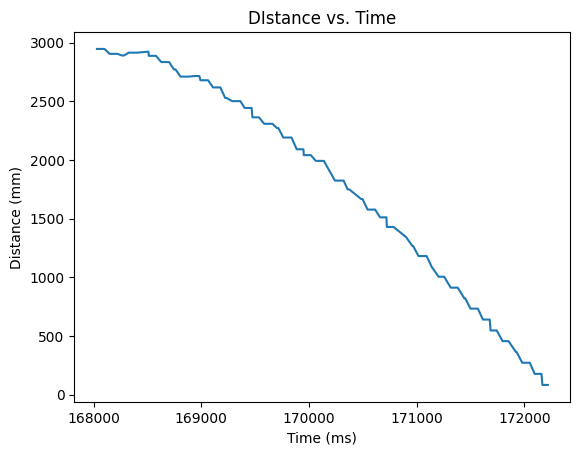

In [51]:
import matplotlib.pyplot as plt

plt.xlabel('Time (ms)')
plt.ylabel('Distance (mm)')
plt.plot(nTime,nd)
plt.title('DIstance vs. Time')
plt.show


In [ ]:
plt.xlabel('Time (ms)')
plt.ylabel('PWM')
plt.plot(times[2:],pwm[2:])
plt.title('PWM vs. Time')
plt.show

In [ ]:
import matplotlib.pyplot as plt

plt.xlabel('Time (ms)')
plt.ylabel('Amplitude')
plt.yticks([min(d1),max(d1),min(d2),max(d2),min(pitch),max(pitch),min(roll),max(roll)])
plt.plot(TOFtimes,d1,label="TOF1")
plt.plot(TOFtimes,d2,label="TOF2")
plt.plot(IMUtimes,pitch,label="Pitch")
plt.plot(IMUtimes,roll,label="Roll")
plt.legend()
plt.title('TOF aand IMU Data')
plt.show


In [ ]:
plt.xlabel('Time (ms)')
plt.ylabel('Angle')
plt.yticks([min(pitch),max(pitch),min(roll),max(roll)])
plt.plot(IMUtimes,pitch,label="Pitch")
plt.plot(IMUtimes,roll,label="Roll")
plt.legend()
plt.title('IMU Data')
plt.show

In [ ]:
ble.stop_notify(ble.uuid['RX_STRING'])
ble.stop_notify(ble.uuid['RX_STRING2'])

## Disconnect

In [ ]:
# Disconnect
ble.disconnect()

In [ ]:
times= [0,10,20,30,40,50,60,70,80,90,100,110,120,130,140]
trial1 = [0.4,10.6,19.9,29.7,39.8,50.1,60.2,69.9,80,89.9,96,109,115,127,80]
trial2 = [0.6,10.4,20.2,29.9,40.4,50.2,60.3,69.8,79.9,90.2,96.1,105,113,125,87]
trial3 = [0.5,10.7,20.1,30.1,40.1,49.9,60.1,70,79.8,89.8,96.5,106,118,124,72]

plt.plot(times[10:],trial1[10:],label = "Trial 1")
plt.plot(times,trial2,label = "Trial 2")
plt.plot(times,trial3,label = "Trial 3")
plt.xlabel('Actual (mm)')
plt.ylabel('Measured (mm)')
plt.show

In [ ]:
from uuid import uuid4
uuid4()